In [1]:
print("테스트")

테스트


# 데이터로딩

In [455]:
import pandas as pd
import numpy as np

train = pd.read_csv("data/titanic/train.csv", index_col = "PassengerId")
test = pd.read_csv("data/titanic/test.csv", index_col = "PassengerId")

print(train.shape, test.shape)

(891, 11) (418, 10)


# Feature Engineering

In [123]:
train.info() # Age, Cabin, Embarked (Fare)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [124]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
test.info() # Age, Fare, Cabin (Embarked)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [126]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [127]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Train + Test

In [128]:
total = pd.concat([train, test], axis = 0, sort = True) # pd.concat([df1, df2], axis=1) axis =1 로 규정하면, 열로 합치는 방식

In [129]:
total.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [130]:
total.shape

(1309, 11)

In [131]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [132]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline

# NaN처리 (Embarked, Fare, Age)

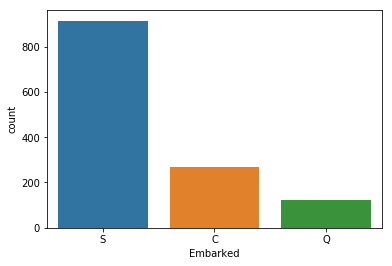

In [134]:
sns.countplot(total["Embarked"])

In [135]:
# Embarked 2개 --> S로

total["Embarked_fill"] = total["Embarked"]
total.loc[total["Embarked"].isnull(), "Embarked_fill"] = "S"
total.loc[total["Embarked_fill"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Embarked_fill
PassengerId,,,,,,,,,,,,


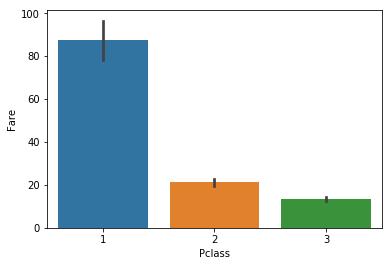

In [136]:
sns.barplot(data = total, x = "Pclass", y = "Fare")

In [137]:
# Fare NaN 1개 --> Pclass 3이라서, 3의 평균 Fare로 처리
total["Fare_fill"] = total["Fare"]
total.loc[total["Fare"].isnull(), "Fare_fill"] = np.array(total.loc[total["Pclass"] == 3].mean())[1]
total.loc[total["Fare_fill"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Embarked_fill,Fare_fill
PassengerId,,,,,,,,,,,,,


# Age 263개 NaN값 (호칭, SibSp, Parch, Familysize)

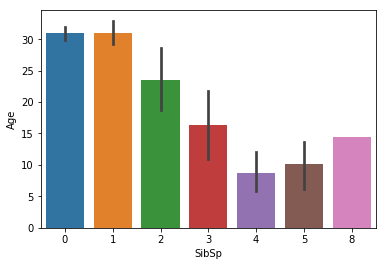

In [138]:
sns.barplot(data = total, x = "SibSp", y = "Age")

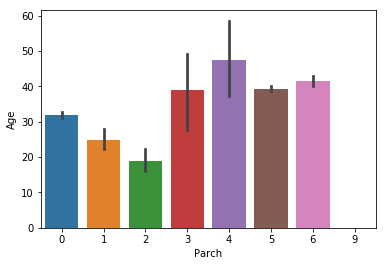

In [140]:
total["Familysize"] = total["Parch"] + total["SibSp"]

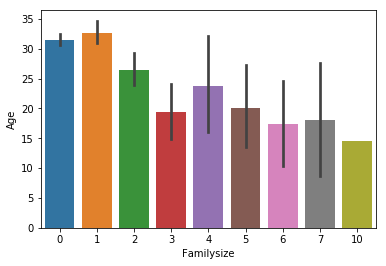

In [141]:
sns.barplot(data = total, x = "Familysize", y = "Age")

In [142]:
#total["Name_encode"] = "NaN"

In [146]:
# total["Name_encode"] = total["Name"]
total.loc[total["Name"].str.contains("Master"), "Name_encode"] = "Master"
total.loc[total["Name"].str.contains("Miss"), "Name_encode"] = "Miss"
total.loc[total["Name"].str.contains("Mr"), "Name_encode"] = "Mr"
total.loc[total["Name"].str.contains("Mrs"), "Name_encode"] = "Mrs"
total.loc[total["Name"].str.contains("Ms"), "Name_encode"] = "Mrs"
total.loc[total["Name_encode"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Embarked_fill,Fare_fill,Familysize,Name_encode
PassengerId,,,,,,,,,,,,,,,
31,40.0,NaN,C,27.7208,"Uruchurtu, Don. Manuel E",0,1,male,0,0.0,PC 17601,C,27.7208,0,NaN
150,42.0,NaN,S,13.0000,"Byles, Rev. Thomas Roussel Davids",0,2,male,0,0.0,244310,S,13.0000,0,NaN
151,51.0,NaN,S,12.5250,"Bateman, Rev. Robert James",0,2,male,0,0.0,S.O.P. 1166,S,12.5250,0,NaN
246,44.0,C78,Q,90.0000,"Minahan, Dr. William Edward",0,1,male,2,0.0,19928,Q,90.0000,2,NaN
250,54.0,NaN,S,26.0000,"Carter, Rev. Ernest Courtenay",0,2,male,1,0.0,244252,S,26.0000,1,NaN
318,54.0,NaN,S,14.0000,"Moraweck, Dr. Ernest",0,2,male,0,0.0,29011,S,14.0000,0,NaN
370,24.0,B35,C,69.3000,"Aubart, Mme. Leontine Pauline",0,1,female,0,1.0,PC 17477,C,69.3000,0,NaN
399,23.0,NaN,S,10.5000,"Pain, Dr. Alfred",0,2,male,0,0.0,244278,S,10.5000,0,NaN
450,52.0,C104,S,30.5000,"Peuchen, Major. Arthur Godfrey",0,1,male,0,1.0,113786,S,30.5000,0,NaN


In [155]:
total.loc[((total["Sex"] == "female") & (total["Name_encode"].isnull())), "Name_encode"] = "Miss"
total.loc[((total["Sex"] == "male") & (total["Name_encode"].isnull())), "Name_encode"] = "Mr"

#total[["Name", "Name_encode"]].head(20)
total.loc[total["Name_encode"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Embarked_fill,Fare_fill,Familysize,Name_encode
PassengerId,,,,,,,,,,,,,,,


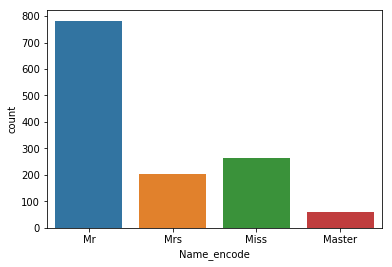

In [156]:
sns.countplot(total["Name_encode"]) #NaN값은 비워두고 안보여줌

In [157]:
total["Name_encode"].describe()

count     1309
unique       4
top         Mr
freq       782
Name: Name_encode, dtype: object

In [160]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 15 columns):
Age              1046 non-null float64
Cabin            295 non-null object
Embarked         1307 non-null object
Fare             1308 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         891 non-null float64
Ticket           1309 non-null object
Embarked_fill    1309 non-null object
Fare_fill        1309 non-null int32
Familysize       1309 non-null int64
Name_encode      1309 non-null object
dtypes: float64(3), int32(1), int64(4), object(7)
memory usage: 198.5+ KB


# Float --> Int

In [161]:
total["Fare_fill"] = total["Fare_fill"].astype("int")

# One-hot Encoding (Sex, Embarked_fill, Name_encode)

In [163]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis = 1)
        # concat으로 DF끼리 합치기, axis =1 으로 열끼리 합치기, 기본은 행끼리
        # pd.get_dummies는 원핫인코딩해주는 pandas 함수, 칼럼과 공통어를 지정해주면 됨.
        #data = data.drop(column, axis = 1) #axis = 1이 없으면, 해당 이름의 행을 삭제함
    return data

dummy_columns = ["Sex", "Embarked_fill", "Name_encode", "Pclass"]

total_dummy = dummy_data(total, dummy_columns)

total = total_dummy

print(total.shape)
total.head()

(1309, 27)


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,...,Embarked_fill_C,Embarked_fill_Q,Embarked_fill_S,Name_encode_Master,Name_encode_Miss,Name_encode_Mr,Name_encode_Mrs,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,...,0,0,1,0,0,1,0,0,0,1
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,...,1,0,0,0,0,0,1,1,0,0
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,...,0,0,1,0,1,0,0,0,0,1
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,...,0,0,1,0,0,0,1,1,0,0
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,...,0,0,1,0,0,1,0,0,0,1


# Age 예측

In [430]:
from xgboost import XGBRegressor as xgbr
from xgboost import XGBClassifier as xgbc

xgbr()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [431]:
xgbr = xgbr(n_estimators = 500, random_state = 79, n_jobs = -1)
xgbr
# 적절한 n_estimators를 설정하고, learning_rate찾기를 권함.
# 추가적으로max_depth도 조정가능(1~5사이)"

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=79,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [432]:
total.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket', 'Embarked_fill', 'Fare_fill',
       'Familysize', 'Name_encode', 'Sex_female', 'Sex_male',
       'Embarked_fill_C', 'Embarked_fill_Q', 'Embarked_fill_S',
       'Name_encode_Master', 'Name_encode_Miss', 'Name_encode_Mr',
       'Name_encode_Mrs', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [433]:
features_age = ['Parch', 'SibSp', 'Fare_fill',
       'Familysize', 'Sex_female', 'Sex_male',
       'Embarked_fill_C', 'Embarked_fill_Q', 'Embarked_fill_S',
       'Name_encode_Master', 'Name_encode_Miss', 'Name_encode_Mr',
       'Name_encode_Mrs', 'Pclass_1', 'Pclass_2', 'Pclass_3']

features_age3 = ['Familysize', 'SibSp', 'Parch', 'Name_encode_Master', 'Name_encode_Miss', 'Name_encode_Mrs']

features_age1 = ['SibSp', 'Parch', 'Name_encode_Master', 'Name_encode_Miss', 'Name_encode_Mrs']

features_age2 = ['SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Name_encode_Master', 'Name_encode_Miss', 'Name_encode_Mr',
       'Name_encode_Mrs']

label_age = "Age"

total_age_train = total.loc[total["Age"].notnull()]
total_age_test = total.loc[total["Age"].isnull()]

print(total_age_train.shape, total_age_test.shape)

(1046, 27) (263, 27)


In [434]:
X_train_age = total_age_train[features_age]
y_train_age = total_age_train[label_age]
X_test_age = total_age_test[features_age]

# 회귀이므로 Scaling을 해야 함 --> XGB, RF는 필요없음

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train_age)

X_train_age_scaled = scaler.transform(X_train_age)

#X_train_age_scaled.head()
X_train_age.head()

In [435]:
xgbr.fit(X_train_age, y_train_age)
#xgbc.fit(X_train_age, y_train_age)

print(f"회귀 훈련 정확도: {xgbr.score(X_train_age, y_train_age): .3f}")
#print(f"분류 훈련 정확도: {xgbc.score(X_train_age, y_train_age): .3f}")

# 회귀 훈련 정확도:  0.353

회귀 훈련 정확도:  0.655


In [436]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, random_state = 79)
#rfr

In [437]:
rfr.fit(X_train_age, y_train_age)
print(f"RFR 훈련 정확도: {rfr.score(X_train_age, y_train_age): .3f}")

RFR 훈련 정확도:  0.713


# CV, Grid

## (1) 기존대로

In [451]:
scores_age = cross_val_score(xgbr, X_train_age, y_train_age, cv = 10)

print(f"{np.round(scores_age, 2)} \n {scores_age.mean(): .2f}")
#print(f"점수: {scores_age: .4f}")

[0.4  0.48 0.46 0.4  0.5  0.22 0.43 0.35 0.57 0.56] 
  0.44


In [452]:
scores_age = cross_val_score(rfr, X_train_age, y_train_age, cv = 10)

print(f"{np.round(scores_age, 2)} \n {scores_age.mean(): .2f}")

#print(f"점수: {scores_age: .4f}")

[0.39 0.43 0.41 0.43 0.46 0.22 0.37 0.34 0.44 0.55] 
  0.40


## (2) 평균을 넣는게 좋은지, 0.44라도 예측값이 좋은지 검토

In [440]:
print(total_age_train.shape)

(1046, 27)


In [441]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_age, y_train_age, random_state = 79)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((784, 16), (262, 16), (784,), (262,))

In [453]:
xgbr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

kfold = 10

scores_age = cross_val_score(xgbr, X_train, y_train, cv = kfold)
scores_age_rfr = cross_val_score(rfr, X_train, y_train, cv = kfold)

print(f"{np.round(scores_age, 2)} \n {scores_age.mean(): .2f}")
print(f"{np.round(scores_age, 2)} \n {scores_age_rfr.mean(): .2f}")

#print(f"점수: {scores_age: .4f}")

[0.49 0.35 0.43 0.42 0.28 0.29 0.3  0.26 0.44 0.53] 
  0.38
[0.49 0.35 0.43 0.42 0.28 0.29 0.3  0.26 0.44 0.53] 
  0.36


In [454]:
xgbr.fit(X_test, y_test)
rfr.fit(X_test, y_test)

scores_age = cross_val_score(xgbr, X_test, y_test, cv = kfold)
scores_age_rfr = cross_val_score(rfr, X_train, y_train, cv = kfold)

print(f"{np.round(scores_age, 2)} \n {scores_age.mean(): .2f}")
print(f"{np.round(scores_age, 2)} \n {scores_age_rfr.mean(): .2f}")

#print(f"점수: {scores_age: .4f}")

[ 0.    0.53  0.18 -0.07  0.25  0.25  0.43 -0.38  0.61 -0.16] 
  0.16
[ 0.    0.53  0.18 -0.07  0.25  0.25  0.43 -0.38  0.61 -0.16] 
  0.36


## (3) 평균만 넣을 때 R2 스퀘어 ==> 0

In [405]:
y_train_age_mean = [29.88]*1046
y_train_age_mean[:10]

[29.88, 29.88, 29.88, 29.88, 29.88, 29.88, 29.88, 29.88, 29.88, 29.88]

In [ ]:
y_train_age[:10]

In [415]:
gap = y_train_age - y_train_age_mean
print(f"SST = {np.sum(gap**2)}")

gap_bottom = y_train_age_mean - y_train_age_mean
print(f"SSR = {np.sum(gap_bottom**2)}")

SST = 217097.48330000002


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [416]:
from sklearn.metrics import r2_score

print(f"{r2_score(y_train_age, y_train_age_mean):.4f}")  #평균을 넣으면 r2값은 0이 됨

#print(r2_score(y_test, y_test.mean()))

-0.0000


In [378]:
minus = y_train_age_original - y_train_age
minus

PassengerId
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
19      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
28      0.0
31      0.0
34      0.0
35      0.0
36      0.0
38      0.0
39      0.0
       ... 
1273    0.0
1275    0.0
1277    0.0
1278    0.0
1279    0.0
1280    0.0
1281    0.0
1282    0.0
1283    0.0
1284    0.0
1285    0.0
1286    0.0
1287    0.0
1288    0.0
1289    0.0
1290    0.0
1291    0.0
1292    0.0
1293    0.0
1294    0.0
1295    0.0
1296    0.0
1297    0.0
1298    0.0
1299    0.0
1301    0.0
1303    0.0
1304    0.0
1306    0.0
1307    0.0
Name: Age, Length: 1046, dtype: float64